In [1]:
import numpy as np
import scipy.linalg as la

import matplotlib.pyplot as plt

from scipy.spatial import KDTree

from rbffd import *

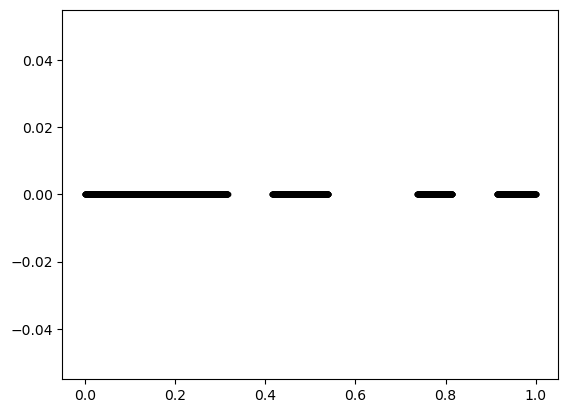

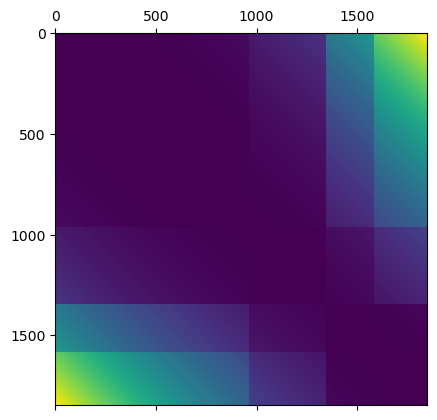

In [12]:
N = 2048 + 1000
# Set up the nodes and epsilon
D = np.linspace(0, 1, N).reshape(-1, 1)  # 1D nodes in the interval [0, 1]

delete_these = np.random.choice(2600, 4, replace=False)

delete_these = np.sort(delete_these)[::-1]

for i in delete_these:
    D = np.delete(D, range(i,i+300), axis=0)



plt.scatter(D, np.zeros_like(D), c='k', s=10)

plt.show()


epsilon = 3.0

A = setup_rbf_matrix(D, epsilon, rbf=phs_rbf)

plt.matshow(A)

In [13]:
# Set up the nodes and epsilon
#N = 40  # Number of nodes
#X = (np.logspace(0, 1, N).reshape(-1, 1)  -1) /10 # 1D nodes in the interval [0, 1]

epsilon = 3.0

tree = KDTree(D)

# Set up the differential operator (Laplacian in this case)
L = laplacian_operator(D, epsilon, rbf=phs_rbf, tree=tree, stencil_size=9, pdeg=1)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors_non = la.eig(L)

index = np.argsort(eigenvalues)

eigenvalues = eigenvalues[index]
eigenvectors_non = eigenvectors_non[:,index]

eigenvalues, eigenvectors_non

(array([-4.23244280e+07-998558.68196583j, -4.23244280e+07+998558.68196583j,
        -4.23238535e+07-790820.20547292j, ...,
         1.12873267e-04     +0.j        ,  5.46313497e-01     +0.j        ,
         6.04282279e-01     +0.j        ]),
 array([[ 1.25009275e-16+4.12380592e-18j,  1.25009275e-16-4.12380592e-18j,
         -1.19170562e-16-8.05810269e-20j, ...,
          0.00000000e+00+0.00000000e+00j,  5.59515213e-02+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-1.53931485e-16-3.51637342e-17j, -1.53931485e-16+3.51637342e-17j,
          1.48291757e-16+3.09686856e-17j, ...,
          0.00000000e+00+0.00000000e+00j,  5.58924183e-02+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 3.66529839e-16-2.68378683e-18j,  3.66529839e-16+2.68378683e-18j,
         -3.36470954e-16+5.29311877e-18j, ...,
          0.00000000e+00+0.00000000e+00j,  5.58333205e-02+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [ 0.00000000e+00

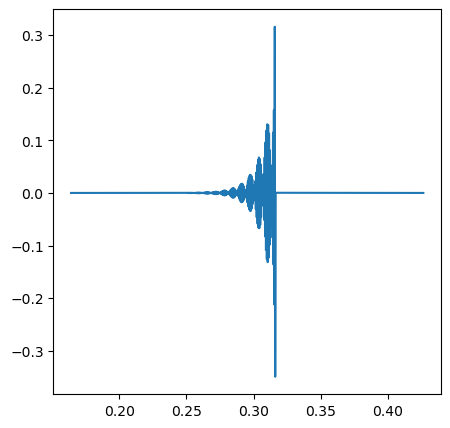

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))  

axs.plot(D[500:1000], eigenvectors_non[500:1000,47], linewidth=2)

plt.show()

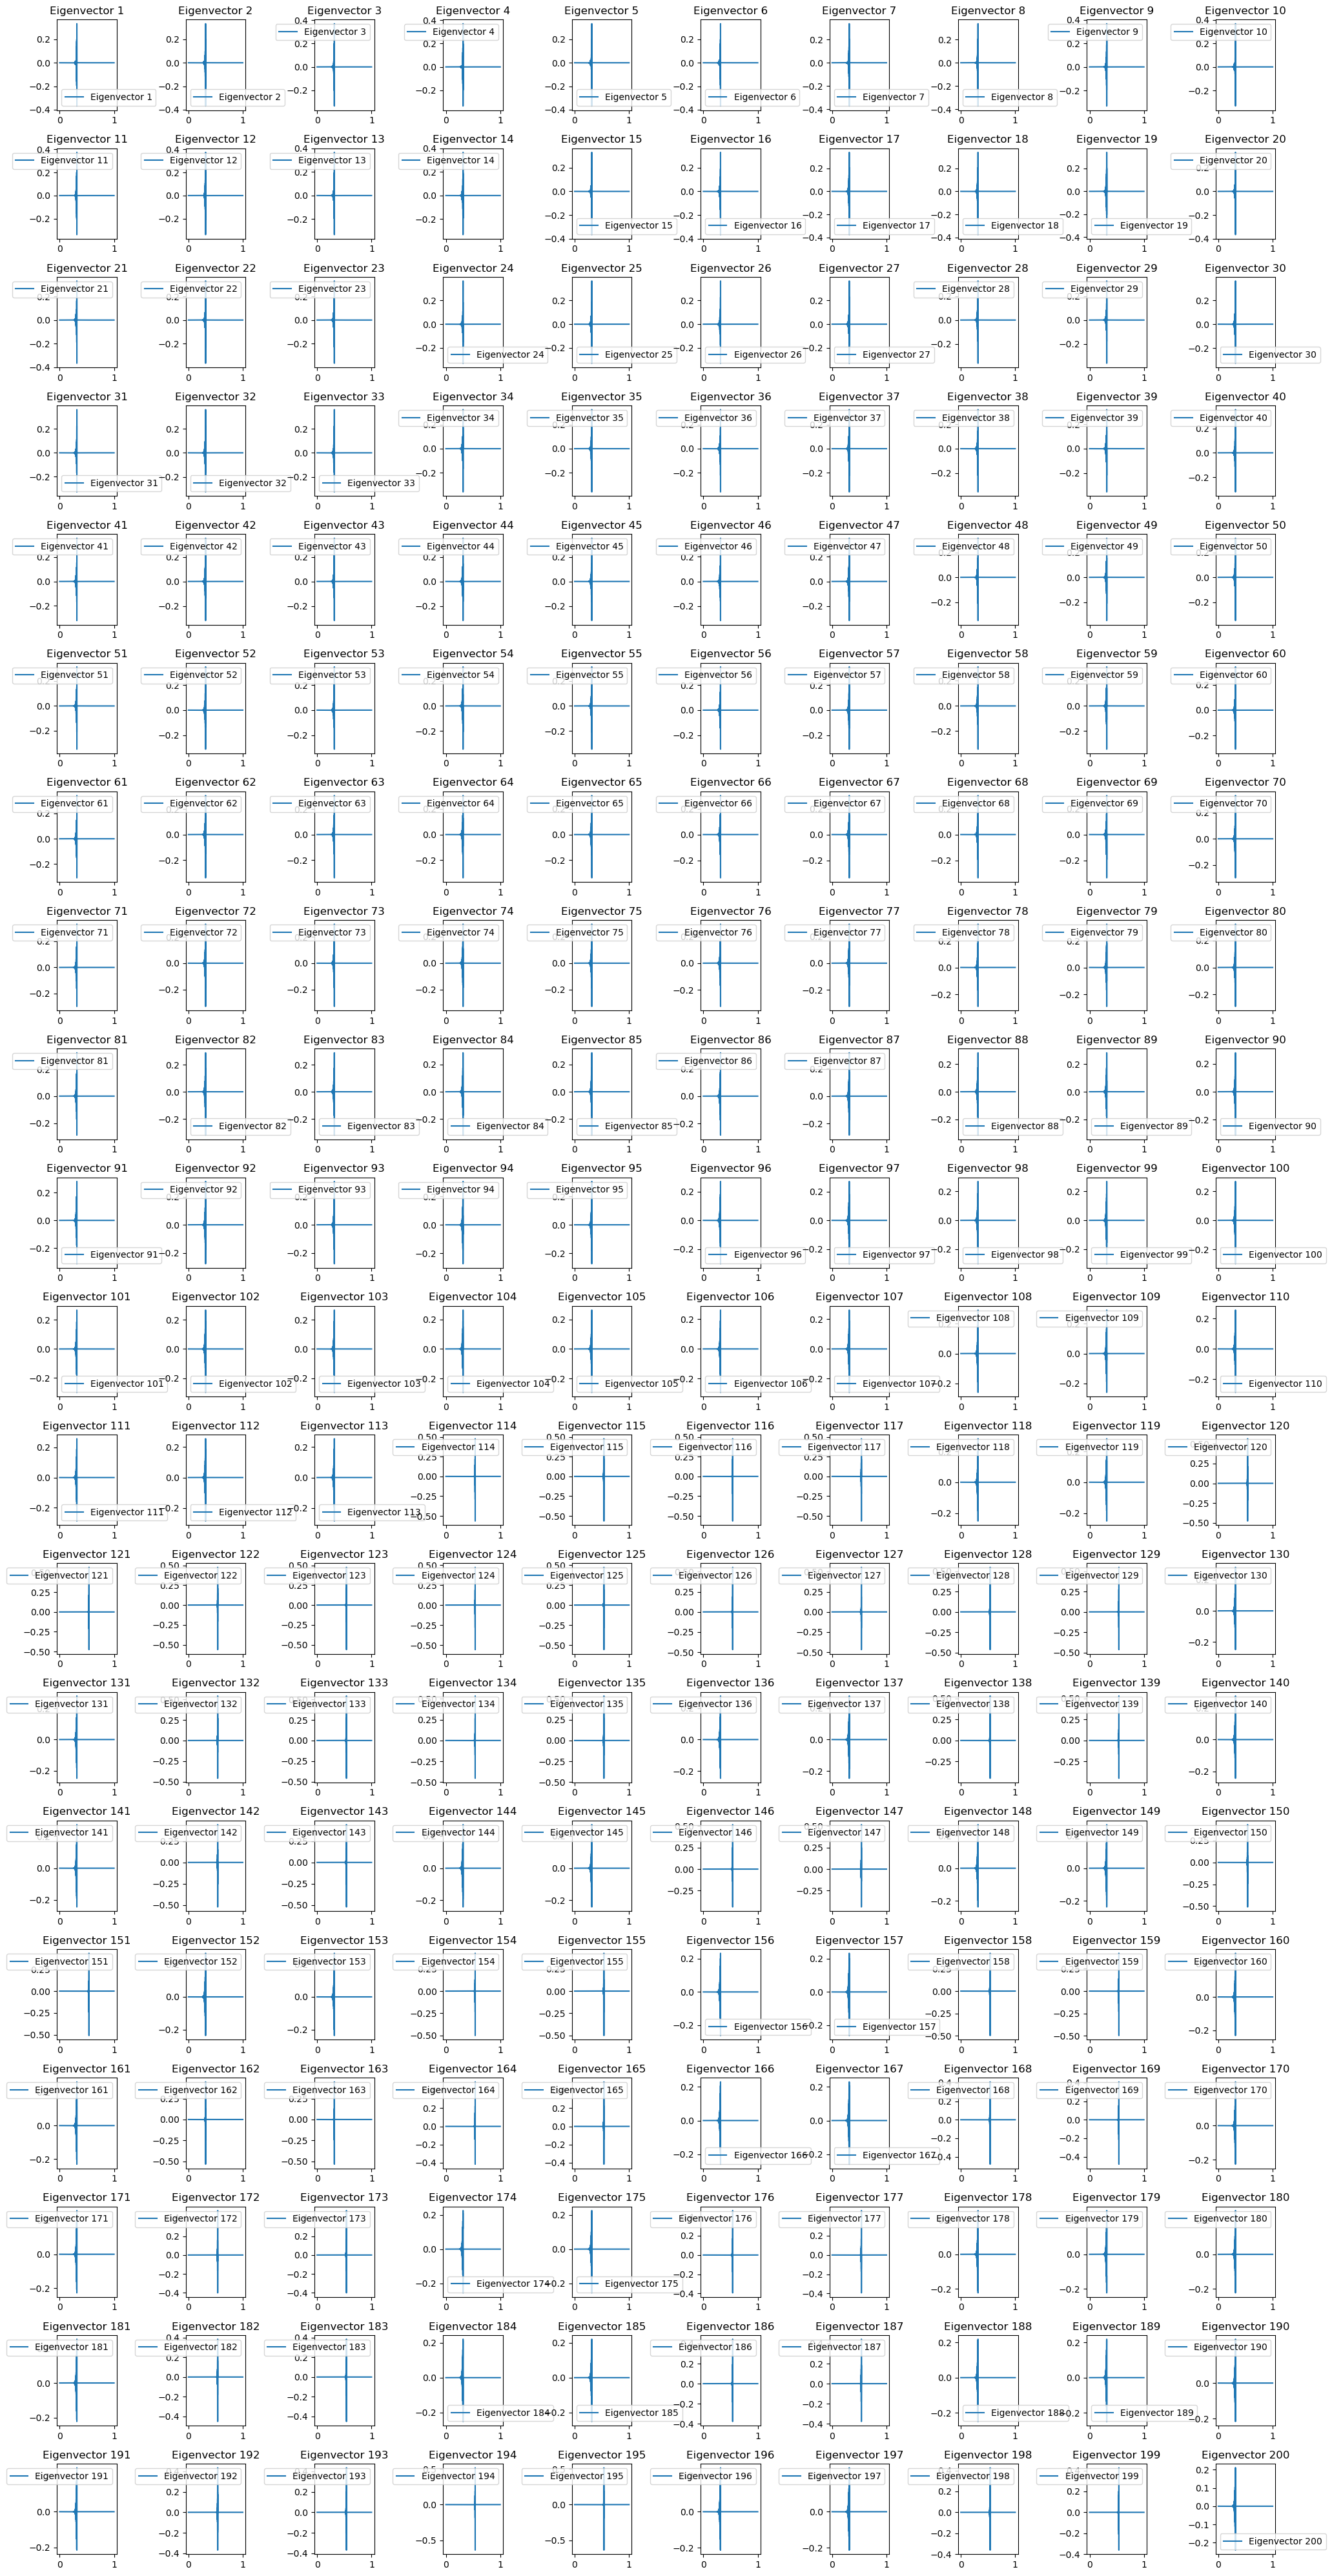

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(20, 10, figsize=(20, 40))

for i, ax in enumerate(axs.flatten()):

    if i > N-1:
        ax.axis("off")
        continue

    ax.plot(D, eigenvectors_non[:, i], label=f"Eigenvector {i+1}")
    ax.set_title(f"Eigenvector {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Set up the nodes and epsilon
Y = np.linspace(0, 1, N).reshape(-1, 1)  # 1D nodes in the interval [0, 1]

epsilon = 1000.0

# Set up the differential operator (Laplacian in this case)
L = laplacian_operator(Y, epsilon, rbf=gaussian_rbf)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors_uniform = la.eig(L)

eigenvalues, eigenvectors_uniform

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 3, figsize=(15, 40))

for i, ax in enumerate(axs.flatten()):

    if i > N-1:
        ax.axis("off")
        continue

    ax.plot(Y, eigenvectors_uniform[:, i], label=f"Eigenvector {i+1}")
    ax.set_title(f"Eigenvector {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(25, 50))

eigenbasis_2d = np.kron(eigenvectors_uniform, eigenvectors_non).reshape(N, N, N**2)

X_mesh, Y_mesh = np.meshgrid(X, Y)

for i, ax in enumerate(axs.flatten()):

    if i > N**2-1:
        ax.axis("off")
        continue

    # Plot the function values as colors in 2D
    #ax.imshow(eigenbasis_2d[:,:,i], cmap='hot', interpolation='nearest')
    ax.pcolormesh(X_mesh, Y_mesh, eigenbasis_2d[:,:,i], cmap='bone')
    ax.set_title(f"Eigenbasis {i+1}")

plt.tight_layout()
plt.show()





